# Отток клиентов

**Описание проекта**

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные. Поясните порядок действий.


2. Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.


3. Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.


4. Проведите финальное тестирование.

**Описание данных**

Признаки:
* `RowNumber` — индекс строки в данных

* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**
* `Exited` — факт ухода клиента

<h1>План проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Импорт-датасета" data-toc-modified-id="Импорт-датасета-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Импорт датасета</a></span></li><li><span><a href="#Разведочный-анализ-данных" data-toc-modified-id="Разведочный-анализ-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разведочный анализ данных</a></span></li><li><span><a href="#Pandas-profiling-(EDA)" data-toc-modified-id="Pandas-profiling-(EDA)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Pandas profiling (EDA)</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Выделение-признаков" data-toc-modified-id="Выделение-признаков-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Выделение признаков</a></span></li><li><span><a href="#Кодирование-признаков" data-toc-modified-id="Кодирование-признаков-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Кодирование признаков</a></span></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Разделение на выборки</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Обучение-baseline-модели" data-toc-modified-id="Обучение-baseline-модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение baseline модели</a></span></li><li><span><a href="#Исследование-важности-признаков" data-toc-modified-id="Исследование-важности-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование важности признаков</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

## Введение

### Импорт библиотек

In [1]:
# gentleman's set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# support
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

# sampling
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler

# display
from IPython.display import display
pd.set_option('max_colwidth', 400)

### Импорт датасета

In [2]:
try:  # local import
    df = pd.read_csv('./datasets/Churn.csv', index_col='RowNumber')

except:  # local import is unavailable => import from Praktikum server
    df = pd.read_csv('/datasets/Churn.csv', index_col='RowNumber')

df.index.name = None

### Разведочный анализ данных

In [3]:
display(df.head(10))
df.info()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


Столбец `Tenure` содержит 909 (9.1%) пропущенных значений. 

### Pandas profiling (EDA)

In [19]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<div class="alert alert-block alert-info">
    
**Комментарий**

EDA проведён в Pandas Profiling. Глобальных проблем не обнаружено.
    
</div>

### Обработка пропусков

In [4]:
def fill_random(df, inplace=False):
    '''
    Fills NaN with values picked from the column itself.
    Using np.random.choice
    '''
    nan_count = df.isna().sum()
    data = np.random.choice(df[df.notnull()], nan_count)
    index = df[df.isna()].index

    return df.fillna(pd.Series(data, index), inplace=inplace)

In [5]:
fill_random(df['Tenure'], inplace=True)

Пропуски в `Tenure` заполнены псевослучайно выбранными значениями из того же столбца. Плюс метода в том, что он меньше нарушает форму распределения, в сравнении с другими наивными способами. Минус в том, что метод создаёт дополнительный шум, однако это хорошая альтернатива вертикальному или горизонтальному удалению.

### Выделение признаков

In [6]:
X = df.drop(['CustomerId', 'Surname', 'Exited'], axis=1)  # features
y = df['Exited']  # target

### Кодирование признаков

In [7]:
categorial = ['Geography', 'Gender']
X = pd.get_dummies(X, columns=categorial, drop_first=True)

Признаки с object-значениями необходимо привести к численному виду. Прямое кодирование подходит для всех используемых далее моделей. Использование универсального метода экономит время и не содаёт много шума в наших условиях. Для уменьшения колиичества степеней свободы первый признак дропается.

### Разделение на выборки

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Промежуточная валидация выполняется методом кросс-валидации. Тестовая выборка необходима для оценки финального результата.

## Исследование задачи

In [9]:
def cls_balance(feature):
    '''
    Displays target class balance using Seaborn countplot.
    '''
    sns.countplot(x=feature)
    plt.title('Баланс классов целевого признака')
    plt.xlabel('Значение класса')
    plt.ylabel('Частота класса')

    val = feature.value_counts()
    val_n = feature.value_counts(normalize=True)
    for i in range(2):
        plt.text(i, val[0]*0.1, '{} / {:.2%}'.format(val[i], val_n[i]),
                 ha='center', c='white', size='large', weight='bold')
    plt.show()

In [10]:
def permutation_plot(clf, X, y, scoring='f1', random_state=42):
    '''
    Assesses the estimated impact of each feature
    from X_train on the quality of the fitted classifier.
    '''
    perm_importance = permutation_importance(clf, X=X, y=y, scoring=scoring, random_state=random_state)
    sorted_idx = perm_importance.importances_mean.argsort()

    plt.figure(figsize=(14, 6))
    sns.barplot(x=perm_importance.importances_mean[sorted_idx], y=X.columns[sorted_idx], orient='h')
    plt.xlabel("Permutation Importance")
    plt.ylabel("Название столбца")
    plt.title('Влияние перетасовки признака на качество модели')
    plt.axvline(0, ls='--')
    plt.show()

In [11]:
def cf_matrix(clf):
    '''
    Custom interface for the Confusion Matrix output.
    '''
    plt.figure(figsize=(7, 6))

    cf_matrix = confusion_matrix(y_test, clf.predict(X_test))

    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]

    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]

    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
      
    plt.title('Матрица ошибок предсказаний целевого признака')
    plt.show()

In [12]:
def clf(names, samplers, classifiers, parameters, log=True, perm=False, test=False):
    '''
    Multifunctional bicycle (Pipeline interface) with GridSearchCV,
    StandardScaler and output interfaces.
    '''
    for name, sampler, classifier, params in zip(names, samplers, classifiers, parameters):

        clf_pipe = Pipeline(
            steps=[
                ('scaler', StandardScaler()),
                ('sampler', sampler),
                ('clf', classifier)
            ])
        
        scoring = ['f1', 'roc_auc']

        gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1, scoring=scoring, refit='f1')
        clf = gs_clf.fit(X_train, y_train)

        if not test:
            score_f1 = float(clf.best_score_)
            idx = [*clf.cv_results_['rank_test_f1']].index(1)
            score_auc = clf.cv_results_['mean_test_roc_auc'][idx]
        else:
            score_f1 = clf.score(X_test, y_test)
            score_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

        if sampler == 'passthrough':
            sampler = None

        if log:
            stats['name'].append(name)
            stats['sampler'].append(sampler)
            stats['f1_score'].append(score_f1)
            stats['roc_auc_score'].append(score_auc)
            stats['best_params_'].append(clf.best_params_)
        else:
            print('{} score_f1: {:.6}, roc_auc_score {:.6}'.format(name, score_f1, score_auc))

        if perm:
            permutation_plot(clf, X_train, y_train)
        
        if test:
            cf_matrix(clf)
            return clf

### Баланс классов

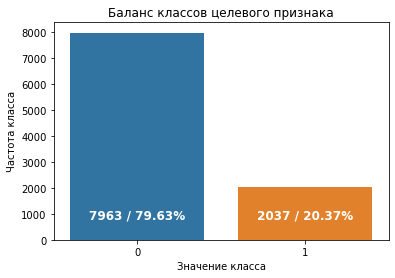

In [13]:
cls_balance(y)

> Баланс смещён в пользу отрицательного класса, в соотношении 4 к 1. Смещенный баланс оказывает влияние на качество работы логистической регрессии. По тому, к какому классу смещён баланс относительно целевого класса принимают решение об используемых метриках качества.

### Обучение baseline модели

In [14]:
stats = {
    'name': [],
    'sampler': [],
    'f1_score': [],
    'roc_auc_score': [],
    'best_params_': [],
}

names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
]

samplers = [
    *['passthrough']*3,
]

classifiers = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
]

parameters = [
    *[{'clf__class_weight': [None]}]*3,
]

clf(names, samplers, classifiers, parameters)
display(pd.DataFrame
        .from_dict(stats, orient='index').transpose()
        .sort_values(by='f1_score', ascending=False))

,name,sampler,f1_score,roc_auc_score,best_params_
2,Random Forest,None,0.578214,0.854239,{'clf__class_weight': None}
1,Decision Tree,None,0.497874,0.687003,{'clf__class_weight': None}
0,Logistic Regression,None,0.316234,0.763421,{'clf__class_weight': None}


Все три алгоритма запущены с параметрами по-умолчанию. Алгоритмы с деревьями демонстрируют устойчивость к дисбалансу классов. Случайный лес выдаёт самый лучший результат. 

### Исследование важности признаков

Random Forest score_f1: 0.578214, roc_auc_score 0.854239


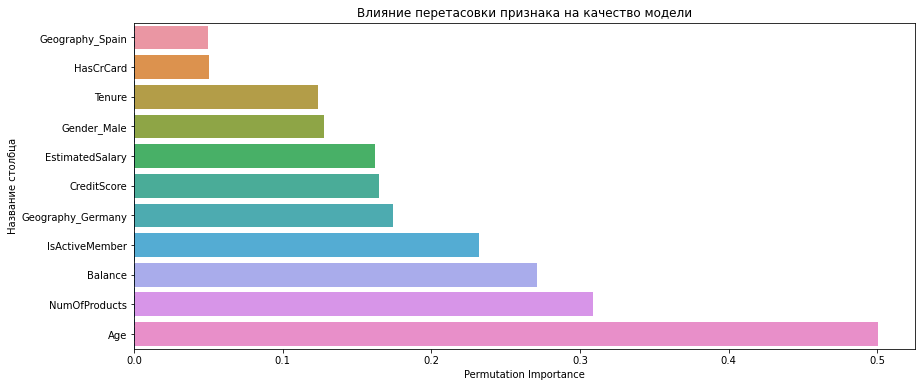

In [15]:
names = [
    'Random Forest',
]

samplers = [
    'passthrough',
]

classifiers = [
    RandomForestClassifier(random_state=42),
]

parameters = [
    {'clf__class_weight': [None]},
]

clf(names, samplers, classifiers, parameters, log=False, perm=True)

Каждый из признаком оказывает влияние на качество предсказания. Самоё большое влияние оказывают возраст клиента, количество банковских продуктов, баланс счёта и бинарный флаг активности. Блиц-проверка показала, что удаление любого из признаков приводит к падению качества предсказания на обучающей выборке.

## Борьба с дисбалансом

<div class="alert alert-block alert-info">
    
**Комментарий**

По сетке подобраны оптимальные параметры. В ячейке сверху расположен шаблон сетки. В ячейке внизу в шаблоне оставлены только оптимальные параметры. Поиск был ограничен вычислительной мощностью рабочего ноутбука. Вероятно существует набор параметров выдающий  качество лучше.
    
</div>

In [16]:
names = [
    *['Logistic Regression']*3,
    *['Decision Tree']*3,
    *['Random Forest']*3,
]

samplers = [
    *[RandomOverSampler(random_state=42),
      RandomUnderSampler(random_state=42),
      'passthrough']*3,
]

classifiers = [
    *[LogisticRegression(random_state=42)]*3,
    *[DecisionTreeClassifier(random_state=42)]*3,
    *[RandomForestClassifier(random_state=42)]*3,
]

parameters = [
    # LogisticRegression -- for 3 runs
    {'clf__C': [0.001], 'clf__class_weight': [None]},
    {'clf__C': [0.1], 'clf__class_weight': [None]},
    {'clf__C': [0.001], 'clf__class_weight': ['balanced']},
    
    # DecisionTreeClassifier -- for 3 runs
    {'clf__class_weight': [None], 'clf__max_depth': [6]},
    {'clf__class_weight': [None], 'clf__max_depth': [6]},
    {'clf__class_weight': ['balanced'], 'clf__max_depth': [6]},
    
    # RandomForestClassifier -- for 3 runs
    {'clf__class_weight': [None], 'clf__max_depth': [10], 'clf__n_estimators': [55]},
    {'clf__class_weight': [None], 'clf__max_depth': [8], 'clf__n_estimators': [45]},
    {'clf__class_weight': ['balanced'], 'clf__max_depth': [10], 'clf__n_estimators': [55]},
]

clf(names, samplers, classifiers, parameters)
display(pd.DataFrame
        .from_dict(stats, orient='index').transpose()
        .sort_values(by='f1_score', ascending=False))

,name,sampler,f1_score,roc_auc_score,best_params_
11,Random Forest,None,0.615526,0.85832,"{'clf__class_weight': 'balanced', 'clf__max_depth': 10, 'clf__n_estimators': 55}"
9,Random Forest,RandomOverSampler(random_state=42),0.612968,0.857551,"{'clf__class_weight': None, 'clf__max_depth': 10, 'clf__n_estimators': 55}"
10,Random Forest,RandomUnderSampler(random_state=42),0.598384,0.854163,"{'clf__class_weight': None, 'clf__max_depth': 8, 'clf__n_estimators': 45}"
2,Random Forest,None,0.578214,0.854239,{'clf__class_weight': None}
8,Decision Tree,None,0.562562,0.824197,"{'clf__class_weight': 'balanced', 'clf__max_depth': 6}"
6,Decision Tree,RandomOverSampler(random_state=42),0.56048,0.823074,"{'clf__class_weight': None, 'clf__max_depth': 6}"
7,Decision Tree,RandomUnderSampler(random_state=42),0.559383,0.82569,"{'clf__class_weight': None, 'clf__max_depth': 6}"
1,Decision Tree,None,0.497874,0.687003,{'clf__class_weight': None}
4,Logistic Regression,RandomUnderSampler(random_state=42),0.493246,0.764965,"{'clf__C': 0.1, 'clf__class_weight': None}"
5,Logistic Regression,None,0.492179,0.765106,"{'clf__C': 0.001, 'clf__class_weight': 'balanced'}"


* Лучший результат показывает случайный лес, в сочетании с синтетически увеличенной выборкой по миноритарному классу.


* В случае со случайным лесом оценка ROC-AUC увеличивается согласованно с F1-мерой, но в целом изменяется в очень небольшом интервале. Примечательно, что в случае с логистической регрессией такой согласованности нет, таким образом AUC-ROC сообщает больше информации.


* Метод борьбы с дисбалансом играет бóльшее значение для случайного леса, чем для логистической регресии.

## Тестирование модели

Random Forest score_f1: 0.615556, roc_auc_score 0.860364


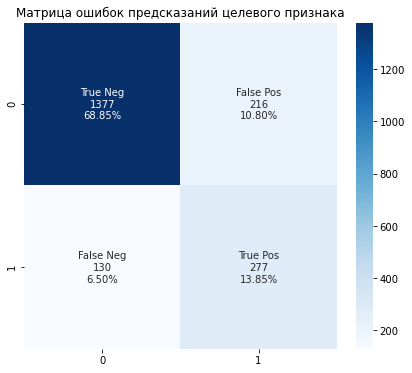

In [17]:
names = [
    'Random Forest',
]

samplers = [
    RandomOverSampler(random_state=42),
]

classifiers = [
    RandomForestClassifier(random_state=42),
]

parameters = [
    {'clf__class_weight': [None],
     'clf__max_depth': [10],
     'clf__n_estimators': [55]},
]

rf = clf(names, samplers, classifiers, parameters, log=False, test=True)

**Вывод**: Валидация показывает оценку F1-меры >0.59. Основная цель проекта достигнута.